# Data Understanding - Temperature

Abril 2023

### Diana Jaimes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import glob
import json
import datetime
from datetime import datetime
import plotly.express as px
import re
from datetime import datetime, date, timedelta
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt


#==============================================
# map
#==============================================
from pathlib import Path
import pandas as pd
import geopandas as gpd
import shapely
import folium

from mpl_toolkits.basemap import Basemap

In [2]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Datos:

In [3]:
data_file_tmax = 'data\\Temperatura Maxima.csv'
data_file_tmin = 'data\\Temperatura Minima.csv'
t_max = pd.read_csv(data_file_tmax)
t_min = pd.read_csv(data_file_tmin)

In [4]:
location= t_max.iloc[:2].reset_index(drop=True)
location

,Estacion,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
0,Latitud,14.838114,13.239000,15.739167,15.449111,15.209111,14.775775,14.059028,15.769139,15.12479
1,Longitud,-85.874675,-87.160056,-86.860000,-87.940056,-83.800139,-88.774443,-87.220056,-87.530056,-87.13358


enviar = location.T.iloc[1:]
enviar.columns=['latitud', 'longitud']
enviar.to_csv('geolocalizacion_temperatura.csv')

In [5]:
t_min= t_min.iloc[2:].reset_index(drop=True)
t_min.head()

,Estacion,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
0,1980-01-01,19.5,23.5,21.2,19.0,24.2,13.0,16.0,19.0,-9999.0
1,1980-01-02,18.0,23.2,18.4,19.0,23.2,13.2,15.0,20.0,-9999.0
2,1980-01-03,19.0,22.8,17.4,17.2,22.4,11.3,13.2,17.6,-9999.0
3,1980-01-04,20.0,22.4,20.0,20.5,23.0,14.6,17.6,20.4,-9999.0
4,1980-01-05,19.5,22.1,19.4,19.4,24.0,15.4,17.4,20.3,-9999.0


In [6]:
t_max = t_max.iloc[2:].reset_index(drop=True)
t_min = t_min.iloc[2:].reset_index(drop=True)


# map

In [7]:
location = location.T
location.columns=location.iloc[0]
location = location.iloc[1:]
location

Estacion,Latitud,Longitud
CATACAMAS,14.838114,-85.874675
CHOLUTECA,13.239,-87.160056
LACEIBA,15.739167,-86.86
LAMESA,15.449111,-87.940056
PUERTOLEMPIRA,15.209111,-83.800139
SANTAROSA,14.775775,-88.774443
TEGUCIGALPA,14.059028,-87.220056
TELA,15.769139,-87.530056
YORO,15.12479,-87.13358


In [8]:
llon=-90
ulon=-83
llat=13
ulat=15

my_map=Basemap(
    projection='merc',
    resolution='l',
    area_thresh=1000.0,
    llcrnrlon=llon,
    llcrnrlat=llat,
    urcrnrlon=ulon,
    urcrnrlat=ulat)


xs, ys = my_map(
    np.asarray(location.Longitud),
    np.asarray(location.Latitud))
location['xm']= xs.tolist()
location['ym']=ys.tolist()

#features

In [9]:
#Create the Map
map_osm = folium.Map(
    location = [14.38100, -90.6],
    zoom_start = 8
)

In [10]:
#You Markler the point in Map
for indice, row in location.iterrows():
    folium.Marker(
        location=[row["Latitud"], row["Longitud"]],
        #icon=folium.map.Icon(color='yellow'),
        icon=folium.Icon(color='Orange',icon_color='pink'),
        zoom_start=10, control_scale=True,min_zoom=1,max_zoom=5
        
        ).add_to(map_osm)
    
    
map_osm

# temperature data

In [11]:
t_max.rename(columns={'Estacion':'date'},inplace=True)
t_max['date'] = pd.to_datetime(t_max['date'])

t_max.set_index('date', inplace=True)
t_max.head()

t_min.rename(columns={'Estacion':'date'},inplace=True)
t_min['date'] = pd.to_datetime(t_min['date'])
t_min.set_index('date', inplace=True)
t_min.head()

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
date,,,,,,,,,
1980-01-03,19.0,22.8,17.4,17.2,22.4,11.3,13.2,17.6,-9999.0
1980-01-04,20.0,22.4,20.0,20.5,23.0,14.6,17.6,20.4,-9999.0
1980-01-05,19.5,22.1,19.4,19.4,24.0,15.4,17.4,20.3,-9999.0
1980-01-06,20.0,21.0,19.4,18.5,23.8,13.0,15.5,20.0,-9999.0
1980-01-07,17.0,22.0,17.6,16.5,24.4,11.2,14.2,17.5,-9999.0


In [12]:
# algunas estaciones estaban con -9999.999 se le asigna nan
t_max=t_max.applymap(lambda x: np.nan if x < 0 else x)
t_min=t_min.applymap(lambda x: np.nan if x < 0 else x)
t_max.describe()

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
count,14884.000000,14627.000000,14680.000000,14809.000000,14336.000000,14898.000000,14915.000000,14460.000000,13549.000000
mean,30.809225,34.931708,29.949223,32.278594,30.392111,25.880373,28.375334,30.403582,29.596059
std,2.200131,2.335233,2.438858,3.337763,1.769449,3.555140,2.592440,2.632269,3.309965
min,21.100000,23.400000,18.000000,18.800000,22.000000,10.700000,16.000000,17.200000,14.800000
25%,29.500000,33.400000,28.800000,30.500000,29.300000,24.200000,27.000000,29.200000,28.000000
50%,31.000000,35.000000,30.400000,32.900000,30.500000,26.400000,28.500000,31.000000,30.000000
75%,32.200000,36.500000,31.600000,34.400000,31.600000,28.000000,30.000000,32.100000,31.700000
max,38.800000,42.100000,38.300000,43.300000,38.800000,37.000000,36.600000,40.700000,39.600000


In [13]:
t_min.describe()

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
count,14882.000000,14625.000000,14678.000000,14807.000000,14334.000000,14896.000000,14913.000000,14458.000000,13549.000000
mean,20.237045,24.274591,21.243528,22.486034,22.828631,16.321657,16.897096,21.848492,17.823249
std,2.160749,1.550841,1.995624,2.034786,2.430220,2.429664,2.398561,1.977085,2.289825
min,10.000000,15.500000,10.600000,13.400000,11.000000,4.200000,4.000000,13.200000,6.000000
25%,19.000000,23.200000,20.000000,21.200000,21.800000,15.000000,15.600000,20.600000,16.500000
50%,20.600000,24.200000,21.500000,22.800000,23.200000,16.900000,17.400000,22.000000,18.200000
75%,21.700000,25.200000,22.800000,24.000000,24.400000,18.000000,18.600000,23.200000,19.500000
max,26.400000,30.400000,27.300000,31.200000,31.200000,22.200000,24.900000,28.100000,23.400000


# some quality checks

CATACAMAS


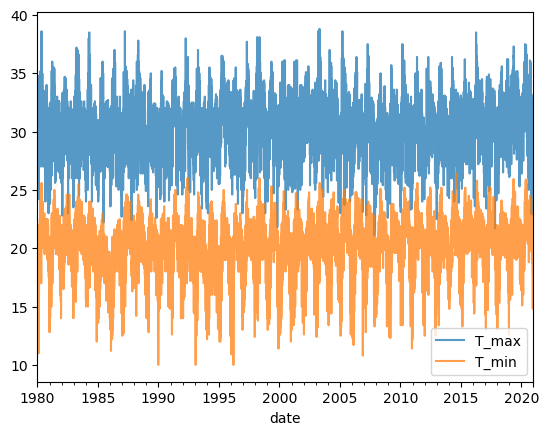

CHOLUTECA


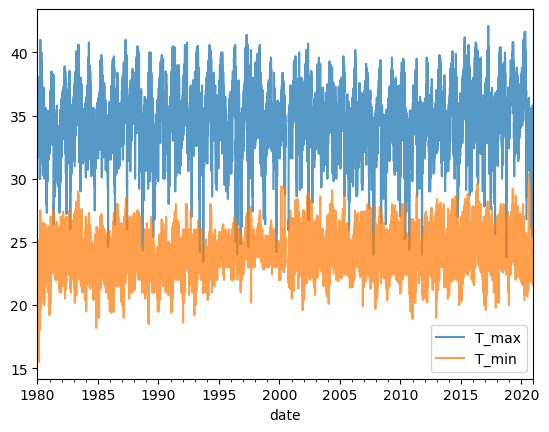

LACEIBA


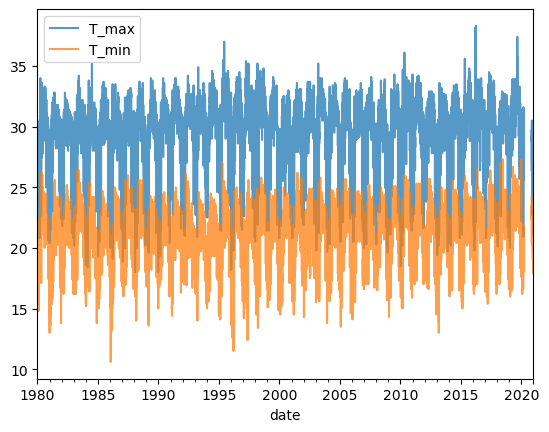

LAMESA


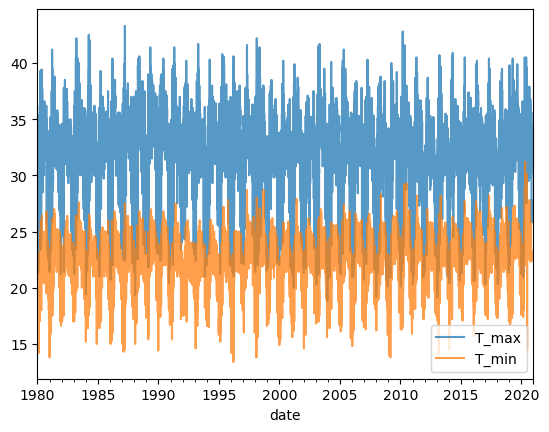

PUERTOLEMPIRA


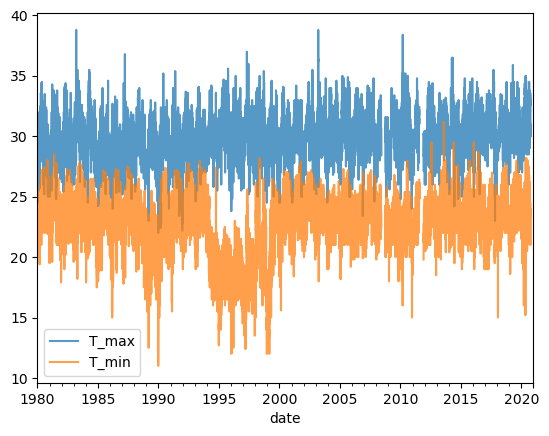

SANTAROSA


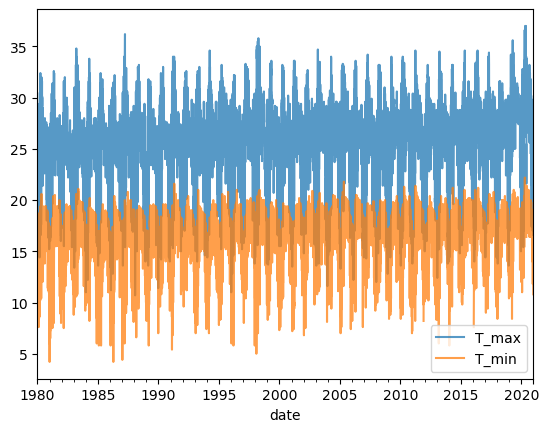

TEGUCIGALPA


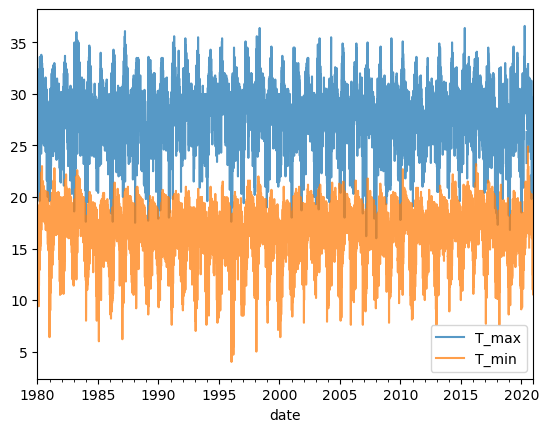

TELA


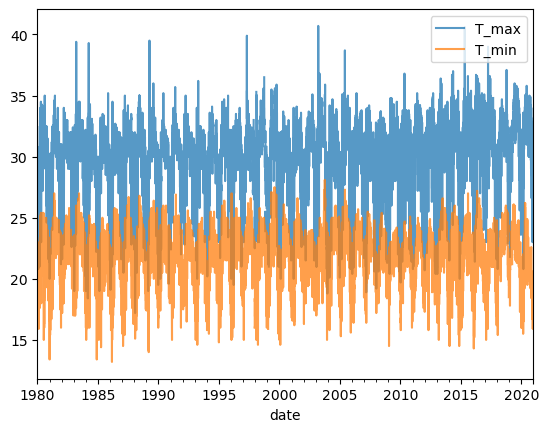

YORO


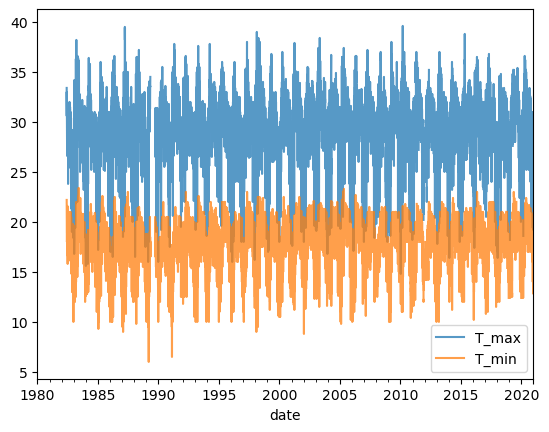

In [14]:
for i in t_max.columns:
    print(i)
    t_max[f'{i}'].plot(label='T_max', alpha=0.75)
    t_min[f'{i}'].plot(label='T_min', alpha=0.75)
    plt.legend()
    plt.show()

# missing value plots over time for each station

In [15]:
t_max_g =t_max.copy()
t_min_g =t_min.copy()
#remplaza los valores por el indice de la columna
for i in t_max_g.columns:
    j=t_max_g.columns.get_loc(f"{i}")+1
    k=t_max_g.columns.get_loc(f"{i}")+1.2
    t_max_g[f"{i}"] = t_max_g[f"{i}"].replace(t_max_g[f"{i}"].dropna().unique(), j)
    t_min_g[f"{i}"] = t_min_g[f"{i}"].replace(t_min_g[f"{i}"].dropna().unique(), k)
    

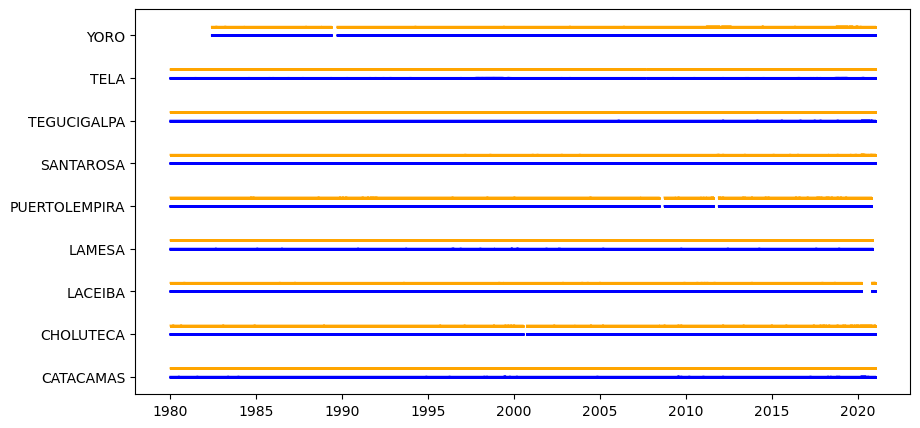

In [16]:
# Creamos la gráfica
# Creamos la figura y el eje

fig, ax = plt.subplots(figsize=(10, 5))
#fig2 = plt.subplots(figsize=(10, 5))
for col in t_max_g.columns:
    fig = plt.plot(t_max_g.index, t_max_g[col], marker='o',markersize=1, label=col, color="blue", alpha=0.8)
    fig2 = plt.plot(t_min_g.index, t_min_g[col], marker='o',markersize=1, label=col, color="orange", alpha=0.8)

ax.set_yticks(list(range(1, 10)))
ax.set_yticklabels(t_max_g.columns.to_list());

#fig.show()

# stations with less than 5% of missing values

In [17]:
t_max.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CATACAMAS      14884 non-null  float64
 1   CHOLUTECA      14627 non-null  float64
 2   LACEIBA        14680 non-null  float64
 3   LAMESA         14809 non-null  float64
 4   PUERTOLEMPIRA  14336 non-null  float64
 5   SANTAROSA      14898 non-null  float64
 6   TEGUCIGALPA    14915 non-null  float64
 7   TELA           14460 non-null  float64
 8   YORO           13549 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


## OUTPUTS

In [18]:
grouper = pd.Grouper(freq='M')

In [19]:
# Agrupamos los datos por mes
months_filter_tmax = t_max.groupby(grouper).agg(lambda x: x.isna().sum())
months_filter_tmin = t_min.groupby(grouper).agg(lambda x: x.isna().sum())
months_filter_tmin

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
date,,,,,,,,,
1980-01-31,0,0,0,0,0,0,0,0,29
1980-02-29,0,1,0,0,0,0,0,0,29
1980-03-31,0,0,0,0,0,0,0,0,31
1980-04-30,0,0,0,0,0,0,0,0,30
1980-05-31,0,0,0,0,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...
2020-08-31,1,12,31,0,0,1,6,0,0
2020-09-30,0,1,30,0,0,0,0,0,0
2020-10-31,0,1,31,0,24,2,1,0,0


In [20]:
t_max_monthly = t_max.groupby(grouper).agg(lambda x: x.mean())
t_min_monthly=  t_min.groupby(grouper).agg(lambda x: x.mean())
t_min_monthly

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
date,,,,,,,,,
1980-01-31,19.389655,20.313793,19.675862,19.889655,23.420690,14.434483,15.755172,20.241379,NaN
1980-02-29,18.472414,18.392857,19.431034,19.941379,22.944828,13.731034,15.475862,20.113793,NaN
1980-03-31,20.741935,21.629032,20.074194,20.903226,23.245161,13.770968,16.761290,20.712903,NaN
1980-04-30,21.333333,21.163333,21.563333,21.966667,23.480000,16.296667,18.483333,22.106667,NaN
1980-05-31,23.270968,24.245161,23.651613,23.593548,24.674194,17.654839,20.700000,23.964516,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-31,22.133333,28.321053,NaN,25.309677,24.677419,18.713333,19.000000,21.274194,19.558065
2020-09-30,22.080000,23.062069,NaN,24.123333,24.010000,18.346667,18.410000,21.220000,19.806667
2020-10-31,21.996774,23.343333,NaN,23.477419,23.700000,18.313793,18.530000,20.293548,19.748387


In [21]:
for i in months_filter_tmin.columns:
    t_min_monthly.loc[months_filter_tmin[f'{i}']>=9, f'{i}'] = np.nan
    t_max_monthly.loc[months_filter_tmax[f'{i}']>=9, f'{i}'] = np.nan

In [22]:
t_max_monthly

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
date,,,,,,,,,
1980-01-31,29.909677,35.158065,27.651613,30.074194,28.529032,23.612903,26.235484,28.093548,NaN
1980-02-29,29.965517,35.339286,28.151724,30.527586,28.779310,23.620690,27.372414,28.606897,NaN
1980-03-31,31.967742,36.738710,29.616129,33.651613,30.293548,27.451613,30.135484,30.512903,NaN
1980-04-30,32.786667,37.560000,29.080000,31.883333,31.366667,26.050000,30.083333,30.053333,NaN
1980-05-31,33.796774,35.525806,31.961290,35.616129,32.203226,29.087097,31.151613,32.867742,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-31,31.703333,NaN,NaN,34.293548,32.158065,29.646667,29.012000,32.935484,30.490323
2020-09-30,34.213333,33.341379,NaN,33.970000,32.546667,29.716667,29.870000,33.220000,31.220000
2020-10-31,31.780645,32.866667,NaN,32.980645,NaN,28.165517,28.536667,31.967742,29.203226


t_min_monthly.to_csv('obs_stations_tmin_montly_mean.csv')
t_max_monthly.to_csv('obs_stations_tmax_montly_mean.csv')

## monthly empties

In [23]:
# Agrupamos los datos por mes
t_max_month_per = t_max.groupby(grouper).agg(lambda x: round(x.count()/len(x),2)*100)
t_max_month_per.head()

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
date,,,,,,,,,
1980-01-31,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1980-02-29,100.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1980-03-31,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1980-04-30,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1980-05-31,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0


In [24]:
t_max_month_per = t_max_month_per.reset_index()
t_max_month_per.head()

,date,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
0,1980-01-31,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1,1980-02-29,100.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
2,1980-03-31,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
3,1980-04-30,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
4,1980-05-31,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0


In [25]:
t_max_month_per['date'] = t_max_month_per['date'].dt.strftime('%Y-%m')

In [28]:
t_max_month_per.set_index('date', inplace=True)
t_max_month_per

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
date,,,,,,,,,
1980-01,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1980-02,100.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1980-03,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1980-04,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
1980-05,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-08,97.0,61.0,0.0,100.0,100.0,97.0,81.0,100.0,100.0
2020-09,100.0,97.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0
2020-10,100.0,97.0,0.0,100.0,23.0,94.0,97.0,100.0,100.0


In [30]:
t_max_month_g = t_max_month_per.where(t_max_month_per>=70)
for i in t_max_month_g.columns:
    j=t_max_month_g.columns.get_loc(f"{i}")+1
    t_max_month_g[f"{i}"] = t_max_month_g[f"{i}"].replace(t_max_month_g[f"{i}"].dropna().unique(), j)

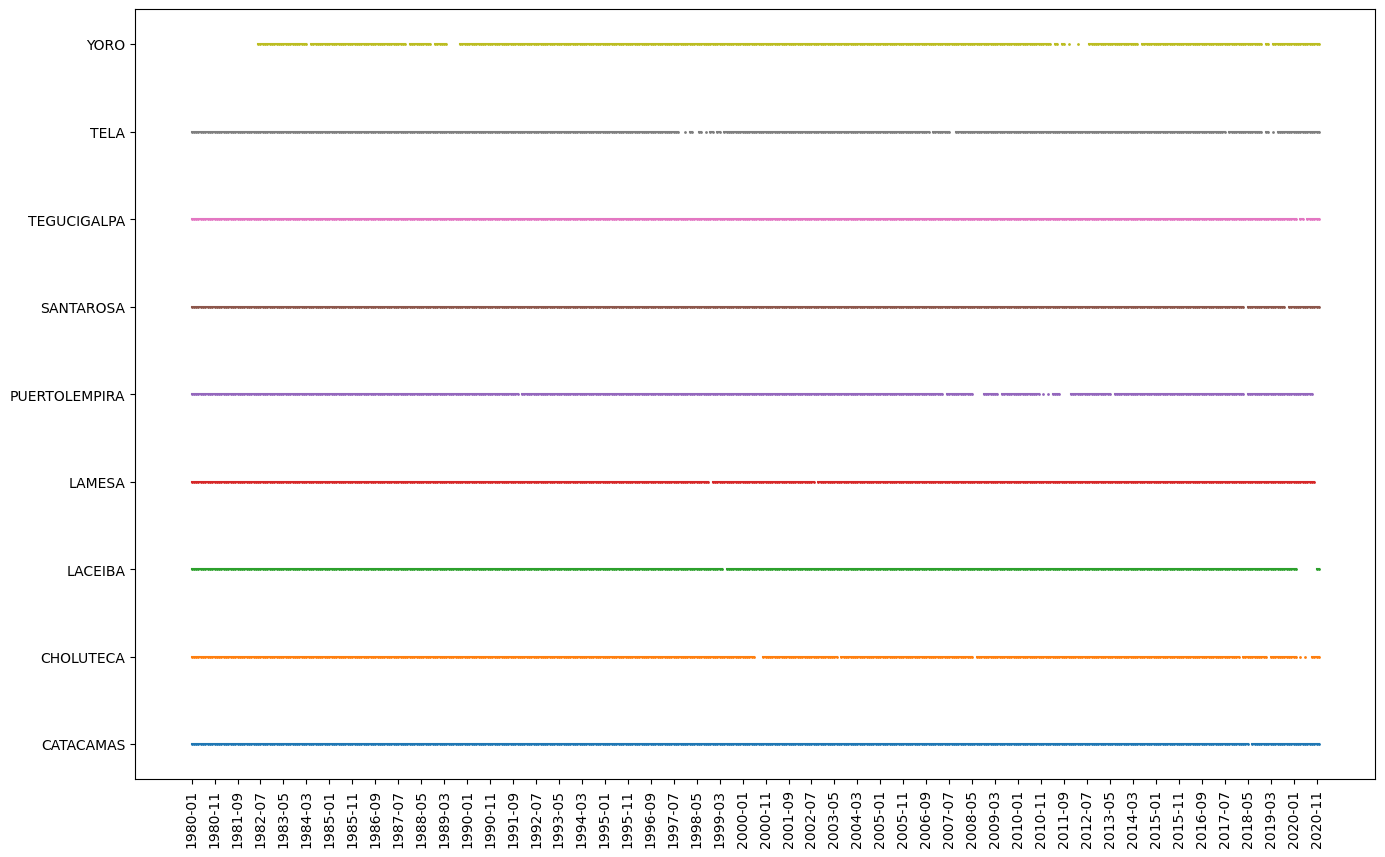

In [31]:

# Creamos la gráfica
# Creamos la figura y el eje

fig, ax = plt.subplots(figsize=(16, 10))
for col in t_max_month_g.columns:
    fig = plt.plot(t_max_month_g.index, t_max_month_g[col], marker='o',markersize=1, label=col)
    
ax.set_yticks(list(range(1, 10)))
ax.set_yticklabels(t_max_month_g.columns.to_list())
#para que aparezca cada 10 valores de x
plt.xticks(t_max_month_g.index[::10])
plt.xticks(fontsize=10, rotation=90);

#fig.show()

# Climatologias

In [32]:
t_max_monthly

,CATACAMAS,CHOLUTECA,LACEIBA,LAMESA,PUERTOLEMPIRA,SANTAROSA,TEGUCIGALPA,TELA,YORO
date,,,,,,,,,
1980-01-31,29.909677,35.158065,27.651613,30.074194,28.529032,23.612903,26.235484,28.093548,NaN
1980-02-29,29.965517,35.339286,28.151724,30.527586,28.779310,23.620690,27.372414,28.606897,NaN
1980-03-31,31.967742,36.738710,29.616129,33.651613,30.293548,27.451613,30.135484,30.512903,NaN
1980-04-30,32.786667,37.560000,29.080000,31.883333,31.366667,26.050000,30.083333,30.053333,NaN
1980-05-31,33.796774,35.525806,31.961290,35.616129,32.203226,29.087097,31.151613,32.867742,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-31,31.703333,NaN,NaN,34.293548,32.158065,29.646667,29.012000,32.935484,30.490323
2020-09-30,34.213333,33.341379,NaN,33.970000,32.546667,29.716667,29.870000,33.220000,31.220000
2020-10-31,31.780645,32.866667,NaN,32.980645,NaN,28.165517,28.536667,31.967742,29.203226


In [ ]:
tela, roatan, balfate... comparar para los datos atipicos!!

In [33]:
#Agregado mensual
t_max_monthly.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='date', length=492)

In [37]:
t_max_monthly['month']=t_max_monthly.index.month
t_min_monthly['month']=t_min_monthly.index.month

## max temperature

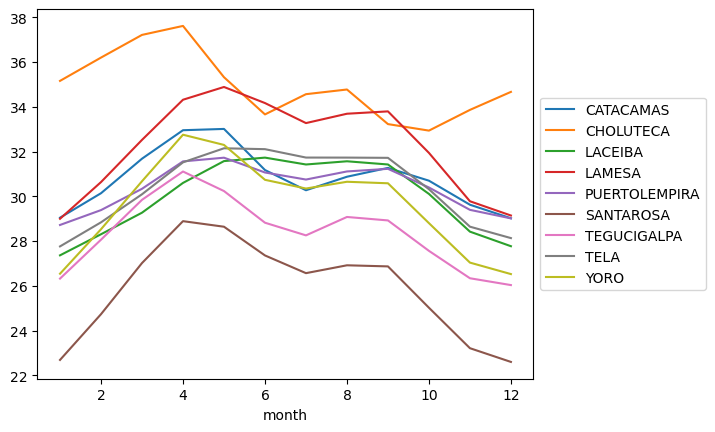

In [35]:
fig = t_max_monthly.groupby(['month']).mean().plot()
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

## minimum temperature

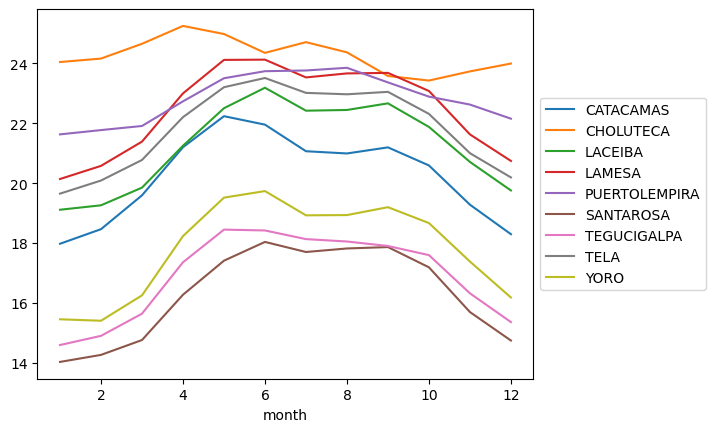

In [38]:
fig2 = t_min_monthly.groupby(['month']).mean().plot()
fig2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

## each station

CATACAMAS


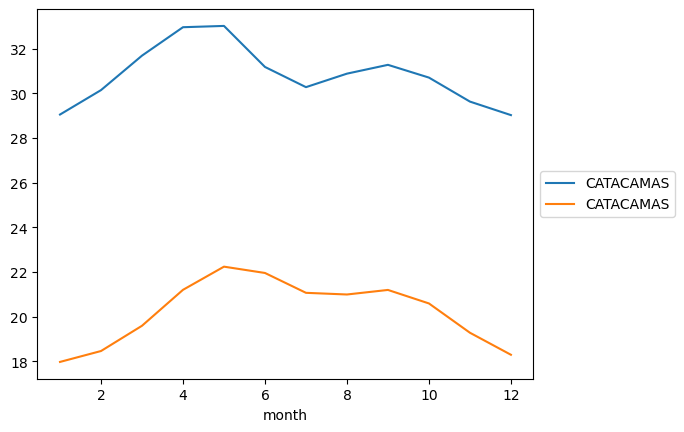

CHOLUTECA


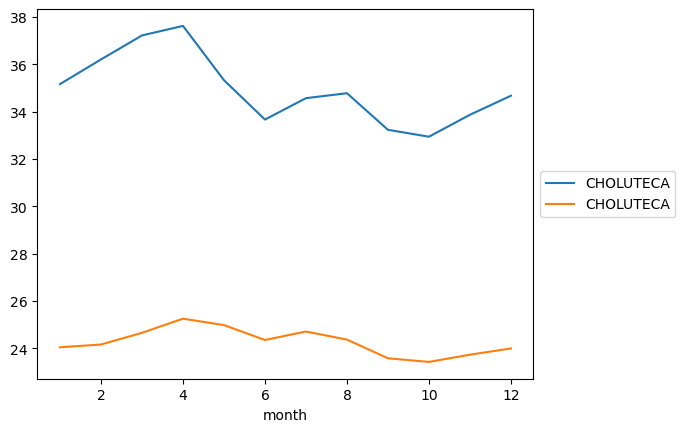

LACEIBA


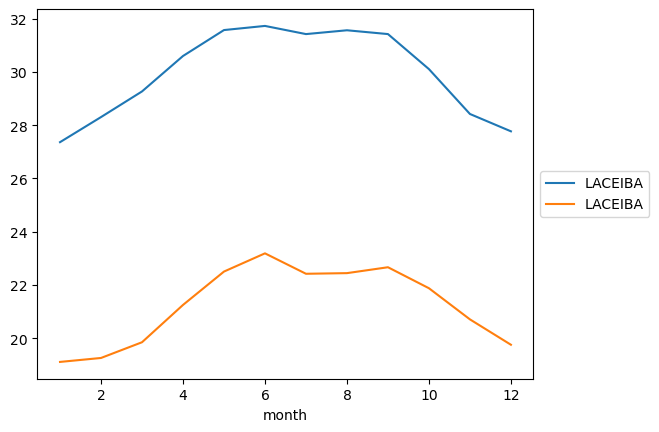

LAMESA


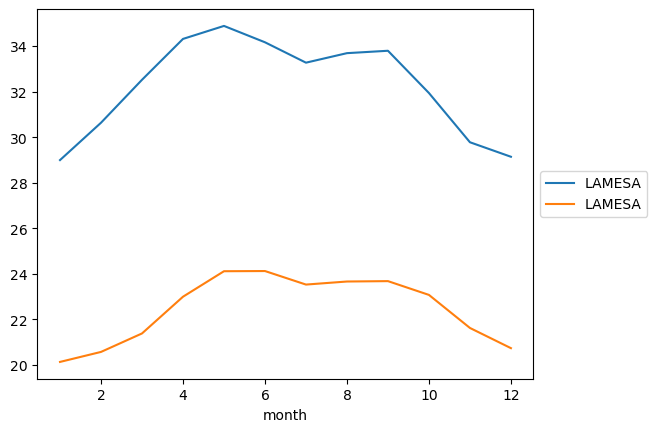

PUERTOLEMPIRA


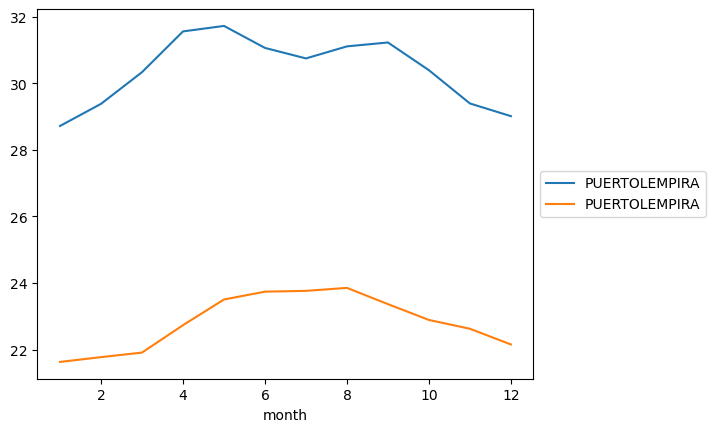

SANTAROSA


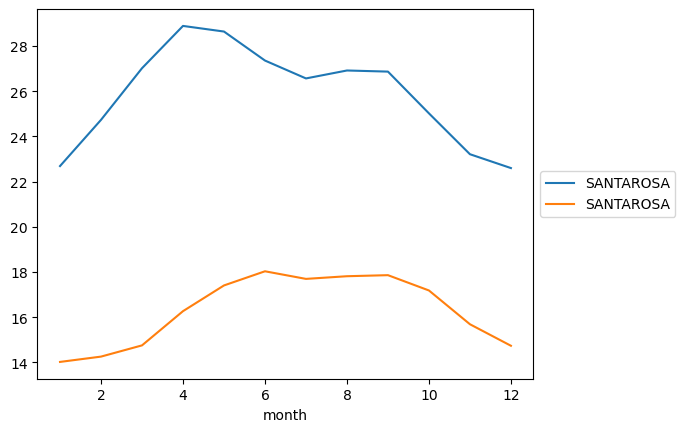

TEGUCIGALPA


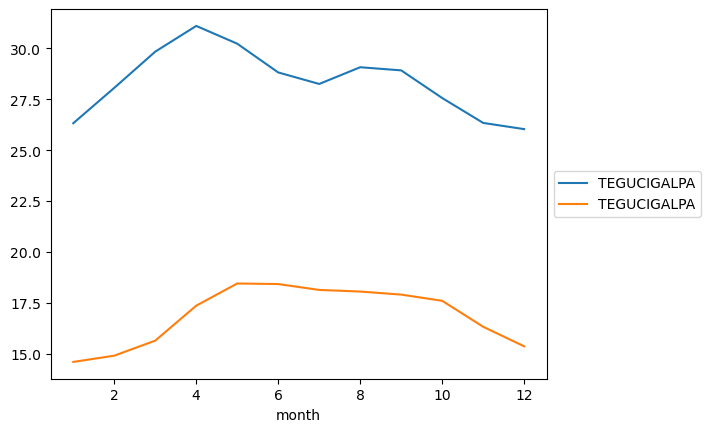

TELA


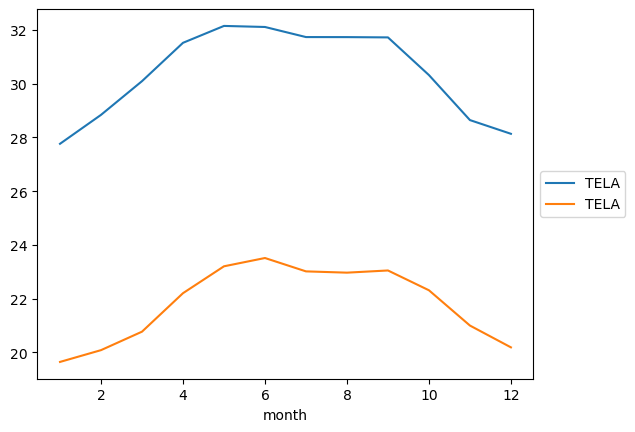

YORO


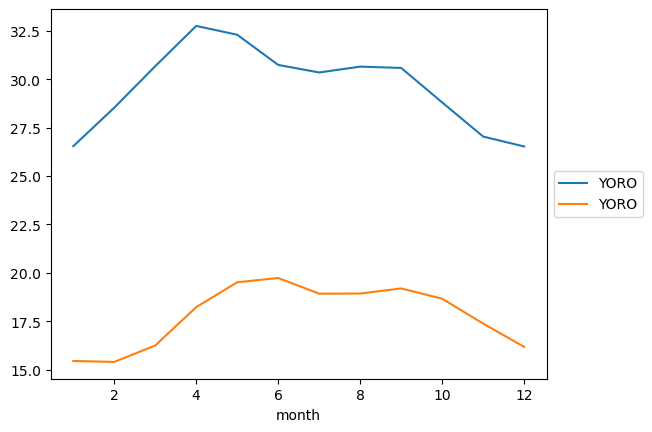

In [39]:
for i in t_max_monthly.groupby(['month']).mean().columns:
    print(i)
    fig2 = t_max_monthly.groupby(['month']).mean()[f'{i}'].plot()
    fig2 = t_min_monthly.groupby(['month']).mean()[f'{i}'].plot()
    fig2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
    plt.show()
    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9b6ac30e-de17-412d-81fb-a49a2e6d29e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>